# McClellan Oscillator

https://stockcharts.com/school/doku.php?id=chart_school:market_indicators:mcclellan_oscillator

Market Indicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
dfs = yf.download(symbol,start,end)

# View Columns
dfs.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800


In [3]:
import talib as ta

https://en.wikipedia.org/wiki/Advance%E2%80%93decline_line

https://www.investopedia.com/terms/m/mcclellanoscillator.asp

In [4]:
change = dfs['Adj Close'].diff()
Advances = change[change > 0]  
Declines = change[change <= 0]

In [5]:
# df[['Advances', 'Declines']] = df[['Advances', 'Declines']].fillna(0)
# df['ADL'] = df['Advances'].fillna(df['Declines'])
# ADL for stocks
dfs['ADL_Stock'] = Advances.combine_first(Declines)

In [6]:
dfs.head()

,Open,High,Low,Close,Adj Close,Volume,ADL_Stock
Date,,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900,NaN
2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900,-0.029434
2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600,0.784820
2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,1.932572
2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800,-0.637650


https://stockcharts.com/school/doku.php?id=chart_school:market_indicators:mcclellan_oscillator

In [7]:
import quandl as q

Advances = q.get('URC/NYSE_ADV', start_date = "2018-01-01")['Numbers of Stocks']
Declines = q.get('URC/NYSE_DEC', start_date = "2018-01-01")['Numbers of Stocks'] 

In [8]:
df = pd.DataFrame()
df['Advances'] = Advances
df['Declines'] = Declines
df.head()

,Advances,Declines
Date,,
2018-01-02,1852.0,1160.0
2018-01-03,1757.0,1211.0
2018-01-04,1755.0,1208.0
2018-01-05,1794.0,1172.0
2018-01-08,1719.0,1240.0


In [9]:
#Ratio Adjusted Net Advances (RANA): (Advances - Declines)/(Advances + Declines)  
#RANA = (advances - declines) / (advances + declines)  
# df['Net_Advances'] = df['Advances'] - df['Declines']
# df['Ratio_Adjusted'] = (df['Net_Advances']/(df['Advances'] + df['Declines']))*1000
df['Net_Advances'] = df['Advances'] - df['Declines'] 
df['Ratio_Adjusted'] = (df['Net_Advances']/(df['Advances'] + df['Declines'])) * 1000
df['19_EMA'] = ta.EMA(df['Ratio_Adjusted'], timeperiod=19)
df['39_EMA'] = ta.EMA(df['Ratio_Adjusted'], timeperiod=39)
df['RANA'] = (df['Advances'] - df['Declines']) / (df['Advances'] + df['Declines']) * 1000

In [10]:
df.tail(20)

,Advances,Declines,Net_Advances,Ratio_Adjusted,19_EMA,39_EMA,RANA
Date,,,,,,,
2019-02-06,1183.0,1774.0,-591.0,-199.864728,187.895896,138.145820,-199.864728
2019-02-07,922.0,2024.0,-1102.0,-374.066531,131.699653,112.535203,-374.066531
2019-02-08,1414.0,1523.0,-109.0,-37.112700,114.818418,105.052808,-37.112700
2019-02-11,1934.0,1017.0,917.0,310.742121,134.410788,115.337273,310.742121
2019-02-12,2218.0,734.0,1484.0,502.710027,171.240712,134.705911,502.710027
2019-02-13,1907.0,1035.0,872.0,296.397009,183.756342,142.790466,296.397009
2019-02-14,1577.0,1356.0,221.0,75.349472,172.915655,139.418416,75.349472
2019-02-15,2293.0,656.0,1637.0,555.103425,211.134432,160.202667,555.103425
2019-02-19,1879.0,1068.0,811.0,275.195114,217.540500,165.952289,275.195114


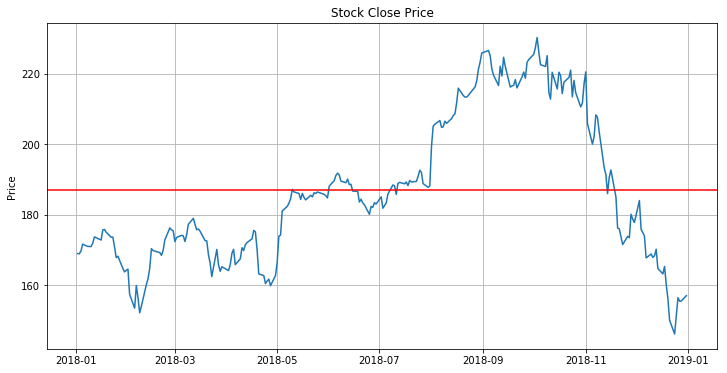

In [11]:
plt.figure(figsize=(12,6))
plt.plot(dfs.index, dfs['Adj Close'])
plt.axhline(y=dfs['Adj Close'].mean(),color='r')
plt.title('Stock Close Price')
plt.grid()
plt.ylabel('Price')
plt.show()

## Comparing Stock and McClellan Oscillator

Text(0.5,0,'Date')

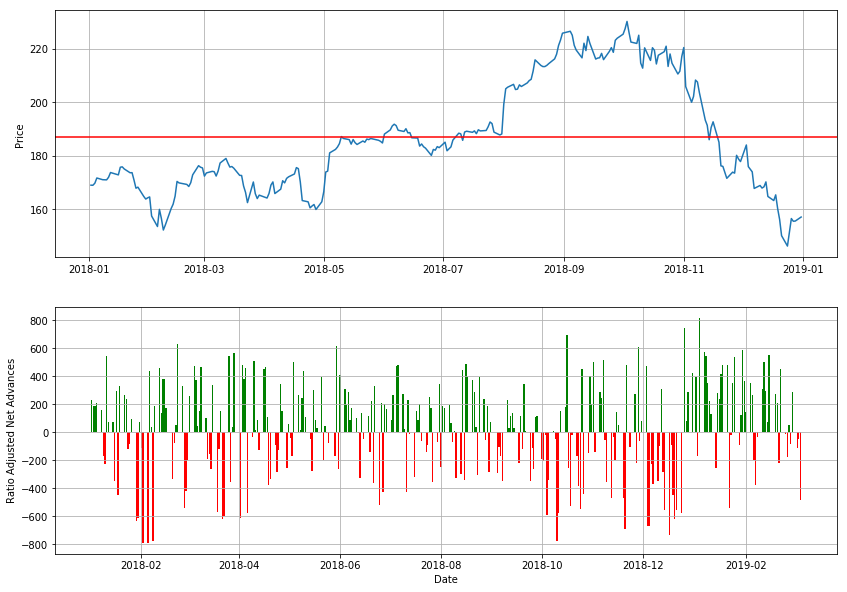

In [12]:
# Line Chart
# See if the stock correlate with Market Indicator
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(dfs.index, dfs['Adj Close'])
ax1.axhline(y=dfs['Adj Close'].mean(),color='r')
ax1.grid()
ax1.set_ylabel('Price')

df['Positive'] = df['RANA'] > 0
ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['RANA'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Ratio Adjusted Net Advances')
ax2.set_xlabel('Date')

## NYSE Advance and Declines

Text(0.5,0,'Date')

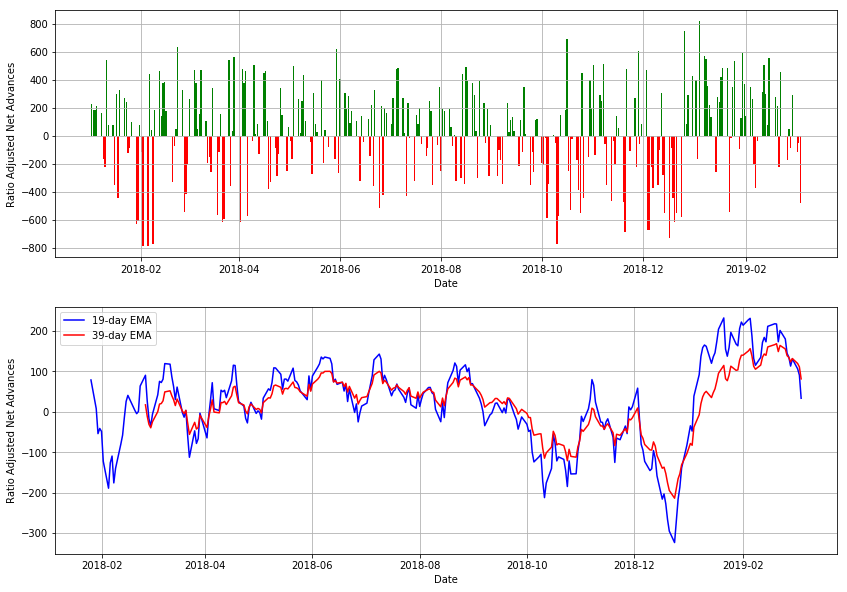

In [13]:
fig = plt.figure(figsize=(14,10))
df['Positive'] = df['RANA'] > 0
ax = plt.subplot(2, 1, 1)
ax.bar(df.index, df['RANA'], color=df.Positive.map({True: 'g', False: 'r'}))
ax.grid()
ax.set_ylabel('Ratio Adjusted Net Advances')
ax.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['19_EMA'], color='b', label='19-day EMA')
ax2.plot(df.index, df['39_EMA'], color='r', label='39-day EMA')
ax2.grid()
ax2.set_ylabel('Ratio Adjusted Net Advances')
ax2.legend(loc='best')
ax2.set_xlabel('Date')